# AI Fundamentals - Assignment 3

This assignment requires you to use [Tensorflow](https://www.tensorflow.org) and [Keras](https://keras.io/). Keras is a high-level Deep Learning API written in Python working as an interface to TensorFlow.

This assignment is divided in two parts. In the first part you will learn about Keras with the help of the example below and the Keras [documentation](https://keras.io/). In the second part, you will practise training a Deep Learning model.

## How to submit
Submit by uploading this notebook to Canvas. It should include **plots**, **results** and **code** showing how the results were genereated.  Remember to name your file(s) appropriately.
It is due on 11:59 of December 9, 2020.

## Installation
Instructions can be found here:
* [Tensorflow](https://www.tensorflow.org/install/)

Since Tensorflow 2.0, Keras is included in Tensorflow and will be automatically installed with Tensorflow. It can be accessed as ```tensorflow.keras```

I recommend using ```pip```. For Tensorflow is it sufficient to install the CPU version. The GPU version requires a good workstation with high-end Nvidia GPU(s), and it is not necessary for this tutorial.

If you're using a virtualenv:
```
pip3 install tensorflow
```
Add ```sudo``` for a systemwide installation (i.e. no ```virtualenv```).
```
sudo pip3 install tensorflow
```
Make sure that you have ```sklearn```, ```matplotlib``` and ```numpy``` installed, too.


## Part 1 - understand a model

### Optimizers

Loss is the penalty for a bad prediction. That is, loss is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater than zero. The goal of training a model is to find a set of weights and biases (i.e. parameters) that have, on average, a low loss across all examples. The term cost is used interchangably with loss. See the [loss section](https://keras.io/losses/) in the Keras documentation for a list and descriptions of what is available.

![Side by side loss](https://drive.google.com/uc?id=1DdbQEQLCLCSw4uPsuf0C1nJCfUICT0Ae)
<b>Figure 1.</b> Left: high loss and right: low loss.

<!-- https://drive.google.com/file/d/1DdbQEQLCLCSw4uPsuf0C1nJCfUICT0Ae/view?usp=sharing
<img src="./fig/LossSideBySide.png" width="500">
<figcaption>Figure. Left: high loss and right: low loss.</figcaption>
 -->
The optimizer is the algorithm used to minimize the loss/cost. Optimizers in neural networks work by finding the gradient/derivative of the loss with respect to the parameters (i.e. the weights). "Gradient" is the correct term since a we are looking at multi-dimensional systems (i.e. many parameters), however, the terms are often used interchangably. For those who didn't take multivariate calculus, just think of the gradient as a derivative. The derivative of the loss with respect to a parameters tells us how much the loss changes when we nudge a weight up or down. So, by knowing how a given parameter affects the loss the optimizer can change it so as to decrease the loss. The various optimizers differ in how they change the weights. 

#### Mini-overview over popular optimizers

* **Stochastic Gradient Descent (SGD)**. This is the most basic and easy to understand optimizer. It updates the weights in the negative direction of the gradient by taking the average gradient of mini-batch of data (e.g. 20-1000 examples) in each step. Vanilla SGD only has one hyper-parameter, the learning rate.
* **Momentum**. This optimizer "gains speed" when the gradient has pointed in the same direction for several consecutive updates. That is, it has a momentum and want to keep moving in that direction. It gains momentum by accumulating an exponentially decaying moving average of past gradients. The step size depends on how large and aligned the sequence of gradients are. The most important hyper-parameter is alpha and common values are 0.5 and 0.9.
* **Nesterov Momentum**. This is a modification of the standard momentum optimizer.
* **AdaGrad**. This optimizer Ada-ptively sets the learning rate depending on the steepness/magnitude of the Grad-ients. This is done so that weights with big gradients get a smaller effective learning rate, and weights with small gradients will get a greater effective learning rate. The result is quicker progress in the more gently sloped directions of the weight space and a slowdown in stepp regions.
* **RMSProp**. This is modification of AdaGrad, where the accumulated gradient decays, that is, the influence of previous gradients gradually decreases.
* **Adam**. The name comes from "adaptive moments", and it is a combination of RMSProp and momentum. It has several hyper-parameters.

The above list just gives a quick overview of some of the most common. However, old optimizers are constantly improved and new are developed. SGD and momentum are most basic and easiest to understand and implement. They are still in use, but the more advanced optimizers tend to be better for practical use. Which one to use is generally an emperical question depending on both the data and the model.

For a more complete overview of optimization algorithms see [this comparison](http://ruder.io/optimizing-gradient-descent/), and to see what is available in Keras, see the [optimizer section](https://keras.io/optimizers/) of the documentation.

See the images below for a comparison of optimizers in a 2D space (NAG: Nesterov accelerated gradient, Adadelta: an extension of AdaGrad).

![Contours - optimizer comparison](https://drive.google.com/uc?id=1CmrD-UPZ7EIUjRuO_ib7k9CL1FO2bbLk)
<b>Figure 2.</b> Comparison of six different optimizers.


![Saddle point - optimizer comparison](https://drive.google.com/uc?id=1QVhN9rAvCjXtGyNZkmFivyyCzNsntObh)
<b>Figure 3.</b> Comparison of six different optimizers at a saddle point.

<!-- <img src="./fig/contours_evaluation_optimizers.gif" width="500">
<img src="./fig/saddle_point_evaluation_optimizers.gif" width="500"> -->

In [ ]:
# imports
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# for the random seed
import tensorflow as tf

# set the random seeds to get reproducible results
np.random.seed(1)
tf.random.set_seed(2)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
print(X.shape)

(70000, 784)


In [ ]:
print(X.dtype)

float64


In [ ]:
print(y.dtype)

object


In [ ]:

X, y = X[:1000], y[:1000]
X = X.reshape(X.shape[0], 28, 28, 1)
# Normalize
X = X / 255.
# number of unique classes
num_classes = len(np.unique(y))
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

num_tot = y.shape[0]
num_train = y_train.shape[0]
num_test = y_test.shape[0]

y_oh = np.zeros((num_tot, num_classes))
y_oh[range(num_tot), y] = 1

y_oh_train = np.zeros((num_train, num_classes))
y_oh_train[range(num_train), y_train] = 1

y_oh_test = np.zeros((num_test, num_classes))
y_oh_test[range(num_test), y_test] = 1

In [ ]:
print(X.shape)
print(type(X))
X.shape[0]
y[0]

(1000, 28, 28, 1)
<class 'numpy.ndarray'>


5

In [ ]:
X.shape[1]

28

In [ ]:
print(type(X))

<class 'numpy.ndarray'>


In [ ]:
print(type(y))

<class 'numpy.ndarray'>


In [ ]:
print(X.dtype)

float64


In [ ]:
print(y.dtype)

int32


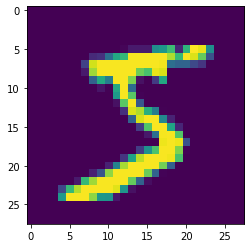

In [ ]:
plt.imshow(X[0])

Text(0.5, 1.0, '9')

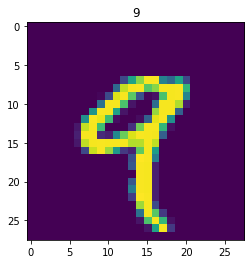

In [ ]:
plt.imshow(X[4])
plt.title(y[4])

In [ ]:
print(type(X))

<class 'numpy.ndarray'>


In [ ]:
y.shape

(1000,)

In [ ]:
y[:5]

array([5, 0, 4, 1, 9])

In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
y_oh.shape

(1000, 10)

In [ ]:
range(num_train)

range(0, 800)

In [ ]:
y_train[0]

1

In [ ]:
print(y)

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1 5 7 1 7 1 1 6 3 0 2 9
 3 1 1 0 4 9 2 0 0 2 0 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3 8 5 4 7 7 4 2 8 5 8 6
 7 3 4 6 1 9 9 6 0 3 7 2 8 2 9 4 4 6 4 9 7 0 9 2 9 5 1 5 9 1 2 3 2 3 5 9 1
 7 6 2 8 2 2 5 0 7 4 9 7 8 3 2 1 1 8 3 6 1 0 3 1 0 0 1 7 2 7 3 0 4 6 5 2 6
 4 7 1 8 9 9 3 0 7 1 0 2 0 3 5 4 6 5 8 6 3 7 5 8 0 9 1 0 3 1 2 2 3 3 6 4 7
 5 0 6 2 7 9 8 5 9 2 1 1 4 4 5 6 4 1 2 5 3 9 3 9 0 5 9 6 5 7 4 1 3 4 0 4 8
 0 4 3 6 8 7 6 0 9 7 5 7 2 1 1 6 8 9 4 1 5 2 2 9 0 3 9 6 7 2 0 3 5 4 3 6 5
 8 9 5 4 7 4 2 7 3 4 8 9 1 9 2 8 7 9 1 8 7 4 1 3 1 1 0 2 3 9 4 9 2 1 6 8 4
 7 7 4 4 9 2 5 7 2 4 4 2 1 9 7 2 8 7 6 9 2 2 3 8 1 6 5 1 1 0 2 6 4 5 8 3 1
 5 1 9 2 7 4 4 4 8 1 5 8 9 5 6 7 9 9 3 7 0 9 0 6 6 2 3 9 0 7 5 4 8 0 9 4 1
 2 8 7 1 2 6 1 0 3 0 1 1 8 2 0 3 9 4 0 5 0 6 1 7 7 8 1 9 2 0 5 1 2 2 7 3 5
 4 9 7 1 8 3 9 6 0 3 1 1 

In [ ]:
print(y[0],y_oh[0])
print(y[1],y_oh[1])
print(y[2],y_oh[2])
#relationship between y and y_oh

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


### Question 1
**The data set**

Plot a three examples from the data set.
* What type of data are in the data set?

    <span style="color:red"> <*float 64 in numpy array, handwritten numbers ranging from 0 to 9*> </span>
    

* What does the line ```X = X.reshape(X.shape[0], 28, 28, 1)``` do?
This reshapes the data to ensure the height and width are 28x28 and 1 represents the color channel. Before reshaping the data was (70000,784)

Look at how the encoding of the targets (i.e. ```y```) is changed. E.g. the lines
```
    y_oh = np.zeros((num_tot, num_classes))
    y_oh[range(num_tot), y] = 1
```
Print out a few rows of ```y``` next to ```y_oh```.
* What is the relationship between ```y``` and ```y_oh```?

    <span style="color:red"> <y is the index of where 1 is in the y_oh row*> </span>
    
    
* What is the type of encoding in ```y_oh``` called and why is it used?

    <span style="color:red"> <one hot encoding and it is used to convert categorical data to integer data because ML algorithms cant work directly with categorical data.> </span>
    
    
* Plot three data examples in the same figure and set the correct label as title. 
    * It should be possible to see what the data represent.

Text(0.5, 1.0, '5')

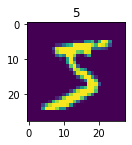

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(131)
ax.imshow(X[0])
ax.set_title(y[0])
#3 seperate examples


Text(0.5, 1.0, '0')

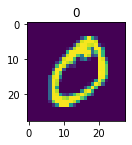

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(132)
ax.imshow(X[1])
ax.set_title(y[1])

Text(0.5, 1.0, '4')

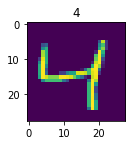

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(133)
ax.imshow(X[2])
ax.set_title(y[2])

Text(0.5, 1.0, '4')

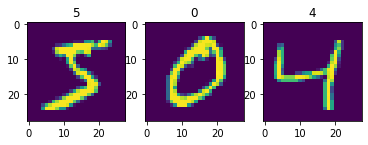

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(131)
ax.imshow(X[0])
ax.set_title(y[0])

ax=fig.add_subplot(132)
ax.imshow(X[1])
ax.set_title(y[1])

ax=fig.add_subplot(133)
ax.imshow(X[2])
ax.set_title(y[2])
#plotting on the same axis

### Question 2
**The model**

Below is some code for bulding and training a model with Keras.
* What type of network is implemented below? I.e. a normal MLP, RNN, CNN, Logistic Regression...?

    <span style="color:red"> <cnn> </span>
    
    
* What does ```Dropout()``` do?

    <span style="color:red"> <randomly sets input units to 0 with a frequency rate at each step during training time to prevent overfitting> </span>


* Which type of activation function is used for the hidden layers?

    <span style="color:red"> <relu> </span>


* Which type of activation function is used for the output layer?

    <span style="color:red"> <softmax> </span>


* Why are two different activation functions used?

    <span style="color:red"> <softmax is used to represent a probability distribution of possible outcomes (probability input belongs to a given class) and captures thr models confidence in a prediction and relu takes a single number as an input and returns the input if the input is positive and 0 if the input is negative. With 2 activation functions, we create increasingly complex filters.> </span>


* What optimizer is used in the model below?

    <span style="color:red"> <SGD> </span>


* How often are the weights updated (i.e. after how many data examples)?

    <span style="color:red"> <32> </span>


* What loss function is used?

    <span style="color:red"> <Categorical Crossentropy> </span>


* How many parameters (i.e. weights and biases, NOT hyper-parameters) does the model have?

    <span style="color:red"> <108618> </span>


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD


model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd)

# Train the model
model.fit(X_train, y_oh_train, batch_size=32, epochs=60)
                                                                       
# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Epoch 1/60
25/25 [==============================] - 1s 18ms/step - loss: 2.2322
Epoch 2/60
25/25 [==============================] - 0s 19ms/step - loss: 1.3094
Epoch 3/60
25/25 [==============================] - 0s 19ms/step - loss: 0.5476
Epoch 4/60
25/25 [==============================] - 0s 19ms/step - loss: 0.3458
Epoch 5/60
25/25 [==============================] - 0s 19ms/step - loss: 0.2481
Epoch 6/60
25/25 [==============================] - 0s 18ms/step - loss: 0.1618
Epoch 7/60
25/25 [==============================] - 0s 19ms/step - loss: 0.1702
Epoch 8/60
25/25 [==============================] - 0s 19ms/step - loss: 0.1203
Epoch 9/60
25/25 [==============================] - 0s 19ms/step - loss: 0.0991
Epoch 10/60
25/25 [==============================] - 0s 19ms/step - loss: 0.0544
Epoch 11/60
25/25 [==============================] - 1s 20ms/step - loss: 0.0416
Epoch 12/60
25/25 [==============================] - 1s 20ms/step - loss: 0.0405
Epoch 13/60
25/25 [==================

In [ ]:
model.count_params()

108618

In [ ]:
w=model.get_weights()

In [ ]:
w

[array([[[[-1.55236319e-01,  9.89941508e-02, -1.41920179e-01,
           -1.24785520e-01,  3.85339439e-01,  5.58272362e-01,
            5.79306558e-02, -7.31276274e-02,  4.55860198e-01,
            2.14987785e-01,  2.95400441e-01,  2.68941075e-01,
            2.37533137e-01,  5.03332876e-02, -4.89647835e-02,
            1.64770558e-01]],
 
         [[ 1.71795413e-02, -1.43696576e-01, -1.49278775e-01,
           -2.06572771e-01,  5.81375301e-01,  1.99791446e-01,
           -1.14922486e-02, -1.25206918e-01,  3.95626426e-01,
            2.34450594e-01,  2.85579771e-01,  3.58075500e-01,
            1.41423181e-01,  2.13619739e-01, -1.54381007e-01,
            2.31677368e-01]],
 
         [[-6.27504438e-02,  1.21049955e-02, -1.77129760e-01,
            2.65367508e-01,  5.73157609e-01,  1.83028191e-01,
            1.31303385e-01, -1.16381884e-01,  4.10868198e-01,
            3.06587458e-01,  4.94386293e-02,  4.86494064e-01,
           -1.77179813e-01,  3.53003651e-01,  2.31179893e-01,
      

## Part 2 - train a model

A model's performance depends on many factors apart from the model architecture (e.g. type and number of layers) and the dataset. Here you will get to explore some of the factors that affect model performance. Much of the skill in training deep learning models lies in quickly finding good values/options for these choises.

In order to observe the learning process it is best to compare the training set loss with the loss on the test set. How to visualize these variables with Keras is described under [Training history visualization](https://keras.io/visualization/#training-history-visualization) in the documentation.

You will explore the effect of 1) optimizer, 2) training duration, and 3) dropout (see the question above).

When training, an **epoch** is one pass through the full training set.

### Question 3

* **Vizualize the training**. Use the model above to observe the training process. Train it for 150 epochs and then plot both "loss" and "val_loss" (i.e. loss on the valiadtion set, here the terms "validation set" and "test set" are used interchangably, but this is not always true). What is the optimal number of epochs for minimizing the test set loss? 
    * Remember to first reset the weights (```model.reset_states()```), otherwise the training just continues from where it was stopped earlier.
    
    #answers are in the comment section but the optimal epoch number was 7 but i chose 50 to reduce total time to 1/3 from the original number of 150 epochs

* **Optimizer**. Select three different optimizers and for each find the close-to-optimal hyper-parameter(s). In your answer, include a) your three choises, b) best hyper-parameters for each of the three optimizers and, c) the code that produced the results.
    * *NOTE* that how long the training takes varies with optimizer. I.e., make sure that the model is trained for long enough to reach optimal performance.
    a) i chose sgd, adam,adagrad, and adamax b) the best hyperparameter was learning rate of 0.01, learnig rate only changed the accuracy for adagrad and adamax and for sgd and adam it was the same for 0.01,0.02,0.03 and 0.04. Adamax produced a higher accuracy than all of them and this was when learning rate was 0.01 and the code is below

* **Dropout**. Use the best optimizer and do hyper-parameter seach and find the best value for ```Dropout()```.
#The best value for dropout is 0.5 as shown in the code below. I tested it with 0,0.5,0.6,0.7, and 0.8.

* **Best model**. Combine the what you learned from the above three questions to build the best model. How much better is it than the worst and average models?

    <span style="color:red"> < #it is better than the average models by giving a better accuracy of  1-4% depending on each optimizer. The worst model was adamax dropout rate of 0.8, it had accuracy of 92% and was worse than the models with different optimizers as they all had accuracy rates of 92.5% of higher. The best model is in the comments in the end, it is adamax, learning rate 0.01 and dropout of 0.5.  *> </span>


* **Results on the test set**. When doing this search for good model configuration/hyper-parameter values, the data set was split into *two* parts: a training set and a test set (the term "validation" was used interchangably wiht "test"). For your final model, is the performance (i.e. accuracy) on the test set representative for the performance one would expect on a previously unseen data set (drawn from the same distribution)? Why?

    <span style="color:red"> <yes because we reset our weights, the validation data is not biased as the evaluation of the training data would result in a biased score. also the model was not trained on the test set it was only trained on the training set, so test set would be the same as previously unseen data> </span>


## Further information
For ideas about hyper-parameter tuning, take a look at the strategies described in the sklearn documentation under [model selection](https://scikit-learn.org/stable/model_selection.html), or in this [blog post](https://blog.tensorflow.org/2020/01/hyperparameter-tuning-with-keras-tuner.html) from TensorFlow. For a more thorough discussion about optimizers see [this video](https://www.youtube.com/watch?v=DiNzQP7kK-s) discussing the article [Descending through a Crowded Valley -- Benchmarking Deep Learning Optimizers](https://arxiv.org/abs/2007.01547).


**Good luck!**

In [ ]:
model.reset_states()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD


model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_oh_train, batch_size=32, epochs=150,validation_data=(X_test,y_oh_test))

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Epoch 1/150
25/25 [==============================] - 2s 35ms/step - loss: 2.2317 - accuracy: 0.2057 - val_loss: 1.7812 - val_accuracy: 0.4750
Epoch 2/150
25/25 [==============================] - 1s 24ms/step - loss: 1.2515 - accuracy: 0.6636 - val_loss: 0.7918 - val_accuracy: 0.7450
Epoch 3/150
25/25 [==============================] - 1s 23ms/step - loss: 0.5384 - accuracy: 0.8148 - val_loss: 0.4853 - val_accuracy: 0.8550
Epoch 4/150
25/25 [==============================] - 1s 24ms/step - loss: 0.3447 - accuracy: 0.8993 - val_loss: 0.3674 - val_accuracy: 0.8850
Epoch 5/150
25/25 [==============================] - 1s 23ms/step - loss: 0.2615 - accuracy: 0.9190 - val_loss: 0.4285 - val_accuracy: 0.8700
Epoch 6/150
25/25 [==============================] - 1s 24ms/step - loss: 0.2047 - accuracy: 0.9271 - val_loss: 0.3760 - val_accuracy: 0.8950
Epoch 7/150
25/25 [==============================] - 1s 24ms/step - loss: 0.1651 - accuracy: 0.9522 - val_loss: 0.3550 - val_accuracy: 0.8950
Epoch 

In [ ]:
# if we increase number of epochs, we get longer training time
#for dropout,it makes the other neurons equally efficient, less connections = faster training time

In [ ]:
w=model.get_weights()

In [ ]:
w

[array([[[[-0.13357006,  0.548377  ,  0.21996218,  0.03071775,
            0.44445854,  0.17814417,  0.03605998, -0.09688392,
            0.20033245,  0.13575324, -0.18022594,  0.12296428,
           -0.01507076, -0.00195981,  0.595177  , -0.16259995]],
 
         [[ 0.13658243,  0.44457173, -0.03829726, -0.00226709,
            0.27973342,  0.12526813,  0.18981713,  0.01298683,
            0.25584617,  0.15164559,  0.20975398,  0.1763876 ,
            0.06520469,  0.32175222,  0.28765664, -0.05920264]],
 
         [[ 0.27827734,  0.14911713, -0.19898559, -0.1427354 ,
            0.20796879, -0.02251739,  0.0032203 , -0.05226165,
           -0.12683988, -0.22708414,  0.41495207,  0.22650738,
            0.01685571,  0.34851494,  0.5552751 , -0.05641799]]],
 
 
        [[[-0.18522076,  0.4418405 ,  0.26668423,  0.35706583,
            0.42352954, -0.04446587, -0.12935868,  0.05291915,
            0.37218857,  0.1743184 , -0.157042  ,  0.33966148,
            0.01309635, -0.0361598 ,  0.

In [ ]:
w[0].shape

(3, 3, 1, 16)

In [ ]:
test_loss

[0.5022115111351013, 0.925000011920929]

In [ ]:
model.metrics

model.metrics_names

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

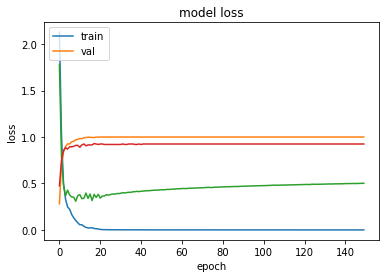

8

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()
np.argmin(history.history['val_loss'])
#this shows that valuation loss is lowest when epoch is 7, we will train the data with 50 epochs to reduce time to 1/3 of the original time although we know we can train with 7.

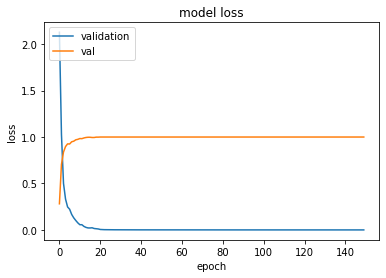

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['validation','val'],loc='upper left')
plt.show()

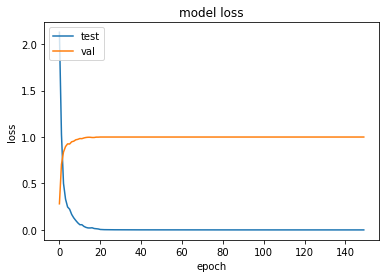

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test','val'],loc='upper left')
plt.show()

In [ ]:
history.history

{'loss': [2.127877950668335,
  1.027855634689331,
  0.5010098814964294,
  0.33155113458633423,
  0.247364804148674,
  0.22277076542377472,
  0.16693542897701263,
  0.13048715889453888,
  0.10185469686985016,
  0.07625922560691833,
  0.056064724922180176,
  0.05615031719207764,
  0.03810036554932594,
  0.027418266981840134,
  0.021508341655135155,
  0.021130509674549103,
  0.023131821304559708,
  0.015378790907561779,
  0.012693231925368309,
  0.010498175397515297,
  0.004956187680363655,
  0.003436090424656868,
  0.002808019518852234,
  0.002335804281756282,
  0.002049956703558564,
  0.001928057987242937,
  0.0017368794651702046,
  0.0016324195312336087,
  0.0014825701946392655,
  0.001401202636770904,
  0.0013289654161781073,
  0.0012745850253850222,
  0.0012078597210347652,
  0.0011468894081190228,
  0.001087456475943327,
  0.0010502781951799989,
  0.00098477303981781,
  0.0009500230080448091,
  0.0009093077387660742,
  0.0008626453345641494,
  0.0008551792125217617,
  0.000818330852

In [ ]:
model.reset_states()

In [ ]:
#model set up
perf=[]
learning_rates=[0.01,0.02,0.03,0.04]
for lr in learning_rates:
    model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
    history=model.fit(X_train, y_oh_train, batch_size=32, epochs=50,validation_data=(X_test,y_oh_test))
    perf.append(history.history['val_accuracy'])

Epoch 1/50
25/25 [==============================] - 2s 35ms/step - loss: 1.5045e-04 - accuracy: 1.0000 - val_loss: 0.5028 - val_accuracy: 0.9250
Epoch 2/50
25/25 [==============================] - 1s 23ms/step - loss: 1.4095e-04 - accuracy: 1.0000 - val_loss: 0.5028 - val_accuracy: 0.9250
Epoch 3/50
25/25 [==============================] - 1s 24ms/step - loss: 1.2858e-04 - accuracy: 1.0000 - val_loss: 0.5036 - val_accuracy: 0.9250
Epoch 4/50
25/25 [==============================] - 1s 24ms/step - loss: 1.5236e-04 - accuracy: 1.0000 - val_loss: 0.5030 - val_accuracy: 0.9250
Epoch 5/50
25/25 [==============================] - 1s 24ms/step - loss: 1.4377e-04 - accuracy: 1.0000 - val_loss: 0.5046 - val_accuracy: 0.9250
Epoch 6/50
25/25 [==============================] - 1s 25ms/step - loss: 1.3129e-04 - accuracy: 1.0000 - val_loss: 0.5035 - val_accuracy: 0.9250
Epoch 7/50
25/25 [==============================] - 1s 24ms/step - loss: 1.4077e-04 - accuracy: 1.0000 - val_loss: 0.5050 - val_ac

In [ ]:
#accuracy is 92.5% for each learning rate for sgd

In [ ]:
history.history['val_accuracy']

[0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929,
 0.925000011920929]

In [ ]:
X_train.shape

(800, 28, 28, 1)

In [ ]:
X.shape

(1000, 28, 28, 1)

In [ ]:
y.shape

(1000,)

In [ ]:
model.reset_states()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adagrad


model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

adagrad = Adagrad(lr=0.01,initial_accumulator_value=0.1,
    epsilon=1e-07, name="Adagrad")

# Compile the model
tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0,
    reduction="auto",
    name="categorical_crossentropy",
)
model.compile(loss='categorical_crossentropy',optimizer=adagrad)

# Train the model
history=model.fit(X_train, y_oh_train, batch_size=32, epochs=150)

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Epoch 1/150
25/25 [==============================] - 1s 21ms/step - loss: 2.2873
Epoch 2/150
25/25 [==============================] - 1s 20ms/step - loss: 2.2020
Epoch 3/150
25/25 [==============================] - 1s 23ms/step - loss: 1.9699
Epoch 4/150
25/25 [==============================] - 1s 23ms/step - loss: 1.3609
Epoch 5/150
25/25 [==============================] - 1s 22ms/step - loss: 0.8147
Epoch 6/150
25/25 [==============================] - 1s 23ms/step - loss: 0.7210
Epoch 7/150
25/25 [==============================] - 1s 25ms/step - loss: 0.4995
Epoch 8/150
25/25 [==============================] - 1s 23ms/step - loss: 0.5483
Epoch 9/150
25/25 [==============================] - 1s 24ms/step - loss: 0.4282
Epoch 10/150
25/25 [==============================] - 1s 26ms/step - loss: 0.3568: 0s - loss: 
Epoch 11/150
25/25 [==============================] - 1s 24ms/step - loss: 0.3214
Epoch 12/150
25/25 [==============================] - 1s 25ms/step - loss: 0.3462
Epoch 13/150

In [ ]:
model.reset_states()

In [ ]:
#model set up
perf=[]
learning_rates=[0.01,0.02,0.03,0.04]
for lr in learning_rates:
    model.compile(loss='categorical_crossentropy', optimizer=adagrad,metrics=['accuracy'])
    history=model.fit(X_train, y_oh_train, batch_size=32, epochs=50,validation_data=(X_test,y_oh_test))
    perf.append(history.history['val_accuracy'])

Epoch 1/50
25/25 [==============================] - 2s 37ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3916 - val_accuracy: 0.9250
Epoch 2/50
25/25 [==============================] - 1s 25ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3934 - val_accuracy: 0.9300
Epoch 3/50
25/25 [==============================] - 1s 25ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3919 - val_accuracy: 0.9300
Epoch 4/50
25/25 [==============================] - 1s 25ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3939 - val_accuracy: 0.9300
Epoch 5/50
25/25 [==============================] - 1s 26ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3914 - val_accuracy: 0.9250
Epoch 6/50
25/25 [==============================] - 1s 25ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3953 - val_accuracy: 0.9300
Epoch 7/50
25/25 [==============================] - 1s 25ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3951 - val_accuracy: 0.9300
Epoch 8/50
25

In [ ]:
#accuracy is slightly different for each learning rate in adagrad

In [ ]:
tf.keras.optimizers

<module 'tensorflow.keras.optimizers' from 'C:\\Users\\awmna\\anaconda3\\envs\\myenv\\lib\\site-packages\\tensorflow\\keras\\optimizers\\__init__.py'>

In [ ]:
model.reset_states()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam


model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

adam=Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam")

tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0,
    reduction="auto",
    name="categorical_crossentropy",
)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=adam)

# Train the model
history=model.fit(X_train, y_oh_train, batch_size=32, epochs=150)

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Epoch 1/150
25/25 [==============================] - 1s 21ms/step - loss: 2.1429
Epoch 2/150
25/25 [==============================] - 1s 21ms/step - loss: 1.0039
Epoch 3/150
25/25 [==============================] - 1s 22ms/step - loss: 0.4662
Epoch 4/150
25/25 [==============================] - 1s 23ms/step - loss: 0.3557
Epoch 5/150
25/25 [==============================] - 1s 23ms/step - loss: 0.2932
Epoch 6/150
25/25 [==============================] - 1s 23ms/step - loss: 0.1780
Epoch 7/150
25/25 [==============================] - 1s 23ms/step - loss: 0.1593
Epoch 8/150
25/25 [==============================] - 1s 23ms/step - loss: 0.1365
Epoch 9/150
25/25 [==============================] - 1s 22ms/step - loss: 0.1074
Epoch 10/150
25/25 [==============================] - 1s 23ms/step - loss: 0.0636
Epoch 11/150
25/25 [==============================] - 1s 23ms/step - loss: 0.0536
Epoch 12/150
25/25 [==============================] - 1s 21ms/step - loss: 0.0624
Epoch 13/150
25/25 [=====

In [ ]:
model.reset_states()

In [ ]:
#model set up
perf=[]
learning_rates=[0.01,0.02,0.03,0.04]
for lr in learning_rates:
    model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])
    history=model.fit(X_train, y_oh_train, batch_size=32, epochs=50,validation_data=(X_test,y_oh_test))
    perf.append(history.history['val_accuracy'])

Epoch 1/50
25/25 [==============================] - 2s 36ms/step - loss: 3.7458e-05 - accuracy: 1.0000 - val_loss: 0.4702 - val_accuracy: 0.9350
Epoch 2/50
25/25 [==============================] - 1s 26ms/step - loss: 3.3202e-05 - accuracy: 1.0000 - val_loss: 0.4704 - val_accuracy: 0.9350
Epoch 3/50
25/25 [==============================] - 1s 25ms/step - loss: 3.1561e-05 - accuracy: 1.0000 - val_loss: 0.4722 - val_accuracy: 0.9350
Epoch 4/50
25/25 [==============================] - 1s 36ms/step - loss: 3.3796e-05 - accuracy: 1.0000 - val_loss: 0.4716 - val_accuracy: 0.9350
Epoch 5/50
25/25 [==============================] - 1s 26ms/step - loss: 2.9975e-05 - accuracy: 1.0000 - val_loss: 0.4730 - val_accuracy: 0.9350
Epoch 6/50
25/25 [==============================] - 1s 28ms/step - loss: 3.0328e-05 - accuracy: 1.0000 - val_loss: 0.4735 - val_accuracy: 0.9350
Epoch 7/50
25/25 [==============================] - 1s 25ms/step - loss: 3.1753e-05 - accuracy: 1.0000 - val_loss: 0.4738 - val_ac

In [ ]:
#accuracy is 93.5% for each learning rate

In [ ]:
model.reset_states()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adamax


model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

adamax=Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax")

tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0,
    reduction="auto",
    name="categorical_crossentropy",
)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=adamax)

# Train the model
history=model.fit(X_train, y_oh_train, batch_size=32, epochs=150)

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Epoch 1/150
25/25 [==============================] - 1s 22ms/step - loss: 2.2260
Epoch 2/150
25/25 [==============================] - 1s 23ms/step - loss: 1.7080
Epoch 3/150
25/25 [==============================] - 1s 22ms/step - loss: 0.9766
Epoch 4/150
25/25 [==============================] - 1s 24ms/step - loss: 0.5855
Epoch 5/150
25/25 [==============================] - 1s 22ms/step - loss: 0.4685
Epoch 6/150
25/25 [==============================] - 1s 22ms/step - loss: 0.3699
Epoch 7/150
25/25 [==============================] - 1s 24ms/step - loss: 0.3452
Epoch 8/150
25/25 [==============================] - 1s 25ms/step - loss: 0.3207
Epoch 9/150
25/25 [==============================] - 1s 25ms/step - loss: 0.2597
Epoch 10/150
25/25 [==============================] - 1s 25ms/step - loss: 0.2131
Epoch 11/150
25/25 [==============================] - 1s 26ms/step - loss: 0.1954: 0s - loss
Epoch 12/150
25/25 [==============================] - 1s 27ms/step - loss: 0.2220
Epoch 13/150
2

In [ ]:
model.reset_states()

In [ ]:
#model set up
perf=[]
learning_rates=[0.01,0.02,0.03,0.04]
for lr in learning_rates:
    model.compile(loss='categorical_crossentropy', optimizer=adamax,metrics=['accuracy'])
    history=model.fit(X_train, y_oh_train, batch_size=32, epochs=50,validation_data=(X_test,y_oh_test))
    perf.append(history.history['val_accuracy'])


Epoch 1/50
25/25 [==============================] - 2s 40ms/step - loss: 8.6279e-05 - accuracy: 1.0000 - val_loss: 0.5975 - val_accuracy: 0.9400
Epoch 2/50
25/25 [==============================] - 1s 28ms/step - loss: 8.2097e-05 - accuracy: 1.0000 - val_loss: 0.6053 - val_accuracy: 0.9400
Epoch 3/50
25/25 [==============================] - 1s 28ms/step - loss: 7.0579e-05 - accuracy: 1.0000 - val_loss: 0.6018 - val_accuracy: 0.9350
Epoch 4/50
25/25 [==============================] - 1s 28ms/step - loss: 7.5237e-05 - accuracy: 1.0000 - val_loss: 0.6081 - val_accuracy: 0.9400
Epoch 5/50
25/25 [==============================] - 1s 27ms/step - loss: 7.3374e-05 - accuracy: 1.0000 - val_loss: 0.6069 - val_accuracy: 0.9400
Epoch 6/50
25/25 [==============================] - 1s 27ms/step - loss: 6.7769e-05 - accuracy: 1.0000 - val_loss: 0.6079 - val_accuracy: 0.9400
Epoch 7/50
25/25 [==============================] - 1s 27ms/step - loss: 7.0149e-05 - accuracy: 1.0000 - val_loss: 0.6067 - val_ac

In [ ]:
#accuracy is different for each learning rate, its 94% with a learning rate of 0.01 which is the best one

In [ ]:
history.history['val_accuracy']

[0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9300000071525574,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9300000071525574,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9350000023841858,
 0.9300000071525574,
 0.9350000023841858,
 0.9300000071525574,
 0.9350000023841858,
 0.9300000071525574,
 0.9350000023841858,
 0.9300000071525574,
 0.9350000023841858,
 0.9300000071

In [ ]:
tf.keras.losses

<module 'tensorflow.keras.losses' from 'C:\\Users\\awmna\\anaconda3\\envs\\myenv\\lib\\site-packages\\tensorflow\\keras\\losses\\__init__.py'>

In [ ]:
#Adamax is the best optimizer for accuracy pf 94% and has a learning rate of 0.01 so I will use that for the next questions

In [ ]:
model.reset_states()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adamax


model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

adamax=Adamax(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax")

tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0,
    reduction="auto",
    name="categorical_crossentropy",
)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=adamax,metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_oh_train, batch_size=32, epochs=50,validation_data=(X_test,y_oh_test))
perf.append(history.history['val_accuracy'])

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Epoch 1/50
25/25 [==============================] - 2s 35ms/step - loss: 2.2409 - accuracy: 0.2171 - val_loss: 1.2458 - val_accuracy: 0.7550
Epoch 2/50
25/25 [==============================] - 1s 26ms/step - loss: 1.0447 - accuracy: 0.6633 - val_loss: 0.6750 - val_accuracy: 0.8500
Epoch 3/50
25/25 [==============================] - 1s 27ms/step - loss: 0.7120 - accuracy: 0.7859 - val_loss: 0.4123 - val_accuracy: 0.9050
Epoch 4/50
25/25 [==============================] - 1s 24ms/step - loss: 0.5692 - accuracy: 0.8454 - val_loss: 0.3335 - val_accuracy: 0.9300
Epoch 5/50
25/25 [==============================] - 1s 23ms/step - loss: 0.3469 - accuracy: 0.8838 - val_loss: 0.2661 - val_accuracy: 0.9400
Epoch 6/50
25/25 [==============================] - 1s 21ms/step - loss: 0.3230 - accuracy: 0.8893 - val_loss: 0.2364 - val_accuracy: 0.9300
Epoch 7/50
25/25 [==============================] - 1s 21ms/step - loss: 0.3138 - accuracy: 0.9077 - val_loss: 0.2184 - val_accuracy: 0.9450
Epoch 8/50
25

In [ ]:
model.reset_states()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adamax


model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(10, activation='softmax'))

adamax=Adamax(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax")

tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0,
    reduction="auto",
    name="categorical_crossentropy",
)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=adamax,metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_oh_train, batch_size=32, epochs=50,validation_data=(X_test,y_oh_test))
perf.append(history.history['val_accuracy'])

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Epoch 1/50
25/25 [==============================] - 1s 32ms/step - loss: 2.3833 - accuracy: 0.1326 - val_loss: 2.0654 - val_accuracy: 0.4550
Epoch 2/50
25/25 [==============================] - 1s 22ms/step - loss: 1.7308 - accuracy: 0.4128 - val_loss: 1.1116 - val_accuracy: 0.7450
Epoch 3/50
25/25 [==============================] - 1s 22ms/step - loss: 1.1415 - accuracy: 0.6047 - val_loss: 0.6986 - val_accuracy: 0.8450
Epoch 4/50
25/25 [==============================] - 1s 24ms/step - loss: 0.7926 - accuracy: 0.7312 - val_loss: 0.5131 - val_accuracy: 0.8700
Epoch 5/50
25/25 [==============================] - 1s 24ms/step - loss: 0.6164 - accuracy: 0.8229 - val_loss: 0.4152 - val_accuracy: 0.8900
Epoch 6/50
25/25 [==============================] - 1s 25ms/step - loss: 0.5483 - accuracy: 0.8137 - val_loss: 0.3412 - val_accuracy: 0.9050
Epoch 7/50
25/25 [==============================] - 1s 25ms/step - loss: 0.5228 - accuracy: 0.8297 - val_loss: 0.3440 - val_accuracy: 0.8850
Epoch 8/50
25

In [ ]:
model.reset_states()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adamax


model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.7))

model.add(Dense(10, activation='softmax'))

adamax=Adamax(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax")

tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0,
    reduction="auto",
    name="categorical_crossentropy",
)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=adamax,metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_oh_train, batch_size=32, epochs=50,validation_data=(X_test,y_oh_test))
perf.append(history.history['val_accuracy'])

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Epoch 1/50
25/25 [==============================] - 2s 35ms/step - loss: 2.3637 - accuracy: 0.1473 - val_loss: 2.1741 - val_accuracy: 0.3750
Epoch 2/50
25/25 [==============================] - 1s 26ms/step - loss: 1.9067 - accuracy: 0.3191 - val_loss: 1.6688 - val_accuracy: 0.6650
Epoch 3/50
25/25 [==============================] - 1s 27ms/step - loss: 1.4666 - accuracy: 0.5034 - val_loss: 1.0708 - val_accuracy: 0.7650
Epoch 4/50
25/25 [==============================] - 1s 27ms/step - loss: 1.2652 - accuracy: 0.5880 - val_loss: 0.8474 - val_accuracy: 0.8300
Epoch 5/50
25/25 [==============================] - 1s 28ms/step - loss: 1.0511 - accuracy: 0.6755 - val_loss: 0.7606 - val_accuracy: 0.8800
Epoch 6/50
25/25 [==============================] - 1s 28ms/step - loss: 0.9603 - accuracy: 0.6426 - val_loss: 0.6819 - val_accuracy: 0.8900
Epoch 7/50
25/25 [==============================] - 1s 28ms/step - loss: 0.9809 - accuracy: 0.6660 - val_loss: 0.5476 - val_accuracy: 0.8950
Epoch 8/50
25

In [ ]:
model.reset_states()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adamax


model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.8))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(10, activation='softmax'))

adamax=Adamax(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax")

tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0,
    reduction="auto",
    name="categorical_crossentropy",
)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=adamax,metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_oh_train, batch_size=32, epochs=50,validation_data=(X_test,y_oh_test))
perf.append(history.history['val_accuracy'])

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Epoch 1/50
25/25 [==============================] - 2s 45ms/step - loss: 2.6828 - accuracy: 0.0926 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 2/50
25/25 [==============================] - 1s 25ms/step - loss: 2.2846 - accuracy: 0.1562 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 3/50
25/25 [==============================] - 1s 27ms/step - loss: 2.2387 - accuracy: 0.2000 - val_loss: 2.2571 - val_accuracy: 0.2950
Epoch 4/50
25/25 [==============================] - 1s 26ms/step - loss: 2.1410 - accuracy: 0.2061 - val_loss: 2.1404 - val_accuracy: 0.4400
Epoch 5/50
25/25 [==============================] - 1s 26ms/step - loss: 1.9823 - accuracy: 0.2772 - val_loss: 2.0329 - val_accuracy: 0.5650
Epoch 6/50
25/25 [==============================] - 1s 25ms/step - loss: 1.9317 - accuracy: 0.3033 - val_loss: 1.9351 - val_accuracy: 0.6300
Epoch 7/50
25/25 [==============================] - 1s 27ms/step - loss: 1.7887 - accuracy: 0.3384 - val_loss: 1.7893 - val_accuracy: 0.7050
Epoch 8/50
25

In [ ]:
#i tested dropout rates of 0 which was given as well as 0.5 to 0.8 because i found that this was the most common dropout rates
#dropout rate of 0.5 gives a higher accuracy than 0,0.6,0.7,and 0.8

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adamax


model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

adamax=Adamax(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax")

tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0,
    reduction="auto",
    name="categorical_crossentropy",
)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=adamax,metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_oh_train, batch_size=32, epochs=50,validation_data=(X_test,y_oh_test))
perf.append(history.history['val_accuracy'])

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Epoch 1/50
25/25 [==============================] - 2s 33ms/step - loss: 1.8089 - accuracy: 0.4306 - val_loss: 0.5593 - val_accuracy: 0.8550
Epoch 2/50
25/25 [==============================] - 1s 23ms/step - loss: 0.3422 - accuracy: 0.8991 - val_loss: 0.3799 - val_accuracy: 0.8950
Epoch 3/50
25/25 [==============================] - 1s 23ms/step - loss: 0.1885 - accuracy: 0.9395 - val_loss: 0.3331 - val_accuracy: 0.9100
Epoch 4/50
25/25 [==============================] - 1s 23ms/step - loss: 0.1810 - accuracy: 0.9524 - val_loss: 0.3401 - val_accuracy: 0.9200
Epoch 5/50
25/25 [==============================] - 1s 21ms/step - loss: 0.1057 - accuracy: 0.9678 - val_loss: 0.2953 - val_accuracy: 0.9400
Epoch 6/50
25/25 [==============================] - 1s 22ms/step - loss: 0.0467 - accuracy: 0.9872 - val_loss: 0.3494 - val_accuracy: 0.9250
Epoch 7/50
25/25 [==============================] - 1s 21ms/step - loss: 0.0436 - accuracy: 0.9888 - val_loss: 0.3043 - val_accuracy: 0.9400
Epoch 8/50
25

In [ ]:
#i tested the dropout rate of 0 and it gave a accuracy of 94% which is less than the accuracy with a dropout of 0.5
#therefore the best model is adamax, learning rate of 0.01 and dropout rate of 0.5

In [ ]:
history.history['val_accuracy']

[0.10000000149011612,
 0.10000000149011612,
 0.29499998688697815,
 0.4399999976158142,
 0.5649999976158142,
 0.6299999952316284,
 0.7049999833106995,
 0.75,
 0.7599999904632568,
 0.7900000214576721,
 0.8149999976158142,
 0.7850000262260437,
 0.8349999785423279,
 0.8550000190734863,
 0.8700000047683716,
 0.875,
 0.8799999952316284,
 0.8500000238418579,
 0.8700000047683716,
 0.8600000143051147,
 0.8600000143051147,
 0.8899999856948853,
 0.875,
 0.8849999904632568,
 0.8899999856948853,
 0.8700000047683716,
 0.8899999856948853,
 0.8849999904632568,
 0.8849999904632568,
 0.9049999713897705,
 0.9049999713897705,
 0.9100000262260437,
 0.9100000262260437,
 0.8999999761581421,
 0.8999999761581421,
 0.9150000214576721,
 0.9049999713897705,
 0.8999999761581421,
 0.9049999713897705,
 0.9100000262260437,
 0.9150000214576721,
 0.9100000262260437,
 0.8999999761581421,
 0.8899999856948853,
 0.9150000214576721,
 0.9150000214576721,
 0.9150000214576721,
 0.9049999713897705,
 0.9150000214576721,
 0.92000